<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/XGBoost/07_early_stopping_by_significant_difference_compared_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb

The objective of this **mini-project** is to validate the **early stopping** **behavior** of the XGBoost library.

# **Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr

The early stopping process **will be applied to a binary classification problem.**

# **Config**
---


In [19]:
sns.set(style="darkgrid")
sns.color_palette("tab10")
title_data = 'EarlyStopping'
random_seed=12354
warnings.filterwarnings("ignore")

# **DATA**
---

Synthetic dataset of 1500 records and 20 features is generated, of which 18 are informative and 2 are redundant. The data has a separation of 0.5 with a cluster concentration of 4 and a classification error rate of 5%. The goal is for the data to be somewhat challenging

In [20]:
X, y = make_classification(
    n_samples=1500,
    n_features=20,
    n_informative=18,
    n_redundant=2,
    n_classes=2,
    flip_y=0.05,
    class_sep=0.5,
    n_clusters_per_class = 2,
    random_state=random_seed
)

**Data split**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.40,
    random_state=random_seed
)

Configuration function that allows setting up early stopping.

In [22]:
def define_earlyStopping(
    round:int=5,
    min_delta:int=0.001,
    metric_name:str='error'):
  return xgb.callback.EarlyStopping(
      rounds = round,
      metric_name = metric_name,
      min_delta = min_delta,
  )

The number of rounds is defined, which will be taken into account for the **early stopping** process.

In [23]:
n_rounds = 100

Early stopping will be implemented at the round level and at the significant difference level. The latter is an optional configuration, as the first one must be defined, and the default gain value is 0.

In [24]:
early_stop = define_earlyStopping(round=n_rounds, min_delta=0)

**Early stopping by rounds**

In [25]:
params = {
    'n_estimators': 1000,
    'random_state': random_seed,
    'learning_rate': 0.001,
    'objective': 'binary:logistic',
    'eval_metric': "error",
    'callbacks': [early_stop]
}

In [26]:
model_rondas = xgb.XGBClassifier(**params)
model_rondas.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
results_rondas = model_rondas.evals_result()

**Early stopping with a min delta of 0.1**

The difference between the metric of the previous iteration and the next one must not be **less than 0.1**, as the process will stop.

In [27]:
early_stop = define_earlyStopping(round=n_rounds, min_delta=0.1)
params = {
    'n_estimators': 1000,
    'random_state': random_seed,
    'learning_rate': 0.001,
    'objective': 'binary:logistic',
    'eval_metric': "error",
    'callbacks': [early_stop]
}

In [28]:
model_delta = xgb.XGBClassifier(**params)
model_delta.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
results_delta = model_delta.evals_result()

**Early stopping with a min delta of 0.07**

The difference between the metric of the previous iteration and the next one must not be **less than 0.07**, as the process will stop.

In [29]:
early_stop = define_earlyStopping(round=n_rounds, min_delta=0.07)
params = {
    'n_estimators': 1000,
    'random_state': random_seed,
    'learning_rate': 0.001,
    'objective': 'binary:logistic',
    'eval_metric': "error",
    'callbacks': [early_stop]
}

In [30]:
model_delta2 = xgb.XGBClassifier(**params)
model_delta2.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
results_delta2 = model_delta2.evals_result()

**Early stopping with a min delta of 0.01**

The difference between the metric of the previous iteration and the next one must not be **less than 0.01**, as the process will stop.

In [31]:
early_stop = define_earlyStopping(round=n_rounds, min_delta=0.01)
params = {
    'n_estimators': 1000,
    'random_state': random_seed,
    'learning_rate': 0.001,
    'objective': 'binary:logistic',
    'eval_metric': "error",
    'callbacks': [early_stop]
}

In [32]:
model_delta3 = xgb.XGBClassifier(**params)
model_delta3.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
results_delta3 = model_delta3.evals_result()

To evaluate the behavior, a model was trained in parallel without the early stopping configuration.

In [33]:
del params['callbacks']
model_no_stop_ronda = xgb.XGBClassifier(**params)
model_no_stop_ronda.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
results_no_stop_rondas = model_no_stop_ronda.evals_result()

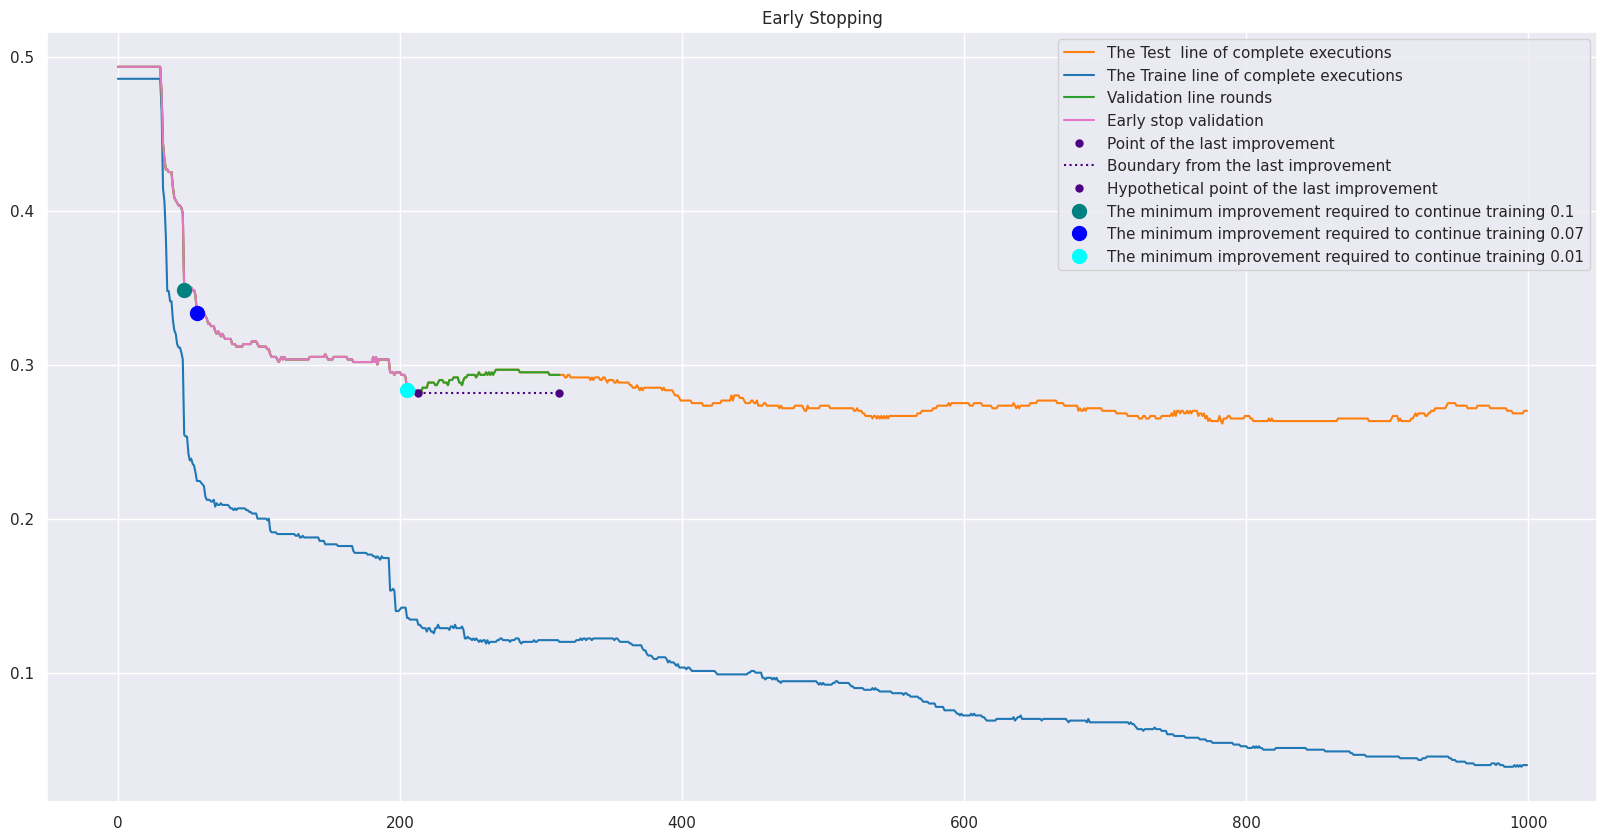

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

ax.plot(
    results_no_stop_rondas['validation_1']['error'],
    label='The Test  line of complete executions',  color='tab:orange')

ax.plot(
    results_no_stop_rondas['validation_0']['error'],
    label='The Traine line of complete executions', color='tab:blue')

ax.plot(
    results_rondas['validation_1']['error'],
    label='Validation line rounds', color='tab:green')
ax.plot(results_rondas['validation_1']['error'][:model_rondas.best_iteration],
           color='tab:pink', label='Early stop validation')

ax.plot(
    model_rondas.best_iteration, model_rondas.best_score, 'o', markersize=5,
    label='Point of the last improvement', color='indigo')
ax.plot(
    [ model_rondas.best_iteration, model_rondas.best_iteration+n_rounds],
     [model_rondas.best_score,model_rondas.best_score],
    label='Boundary from the last improvement', color='indigo', linestyle='dotted')
ax.plot(
    model_rondas.best_iteration+n_rounds, model_rondas.best_score, 'o',
    markersize=5, label='Hypothetical point of the last improvement', color='indigo')

ax.plot(
    model_delta.best_iteration, model_delta.best_score, 'o', markersize=10,
    label='The minimum improvement required to continue training 0.1', color='teal')

ax.plot(
    model_delta2.best_iteration, model_delta2.best_score, 'o', markersize=10,
    label='The minimum improvement required to continue training 0.07', color='blue')

ax.plot(
    model_delta3.best_iteration, model_delta3.best_score, 'o', markersize=10,
    label='The minimum improvement required to continue training 0.01', color='cyan')
ax.legend()
ax.set_title("Early Stopping")
plt.show()

In this graph, five models with the same configurations converge, but with the early stopping implementation configured differently

- The model requires parameter validation, as the training and testing error lines do not converge significantly. The maximum difference between the errors is 30% in the evaluated segment.
- The model configured to stop its training once the training phase is completed has different components:

 - The segment marked with 'o-----o' has the following meaning:
   - The initial point 'o' indicates the final number of iterations of the model, where it stopped showing a significant improvement in its performance (error reduction) between the current iteration and the following 100 iterations, which is represented by the line '----' and the green segment. It is evident that the final 'o' is below the line, meaning that the model could not reduce its error during the training phase over the 100 iterations
   - It is possible that by considering more iterations, the model could have reduced the error, but not in a significant way. This is evident by analyzing the orange segment corresponding to the model without early stopping configuration.

 - The green point indicates the model that stopped because its error reduction was not significant between the current iteration and the next, meaning the error difference was below 0.1. In this case, the model stops even before reaching 100 rounds.

 - The blue point indicates the model that stopped because its error reduction was not significant between the current iteration and the next, meaning the error difference was below 0.07. In this case, the model stops even before reaching 100 rounds.

 - The cyan point indicates the model that stopped because its error reduction was not significant between the current iteration and the next, meaning the error difference was below 0.01. In this case, the model stops very close to the end of the 100 rounds.

- If one visualizes the points, it is clear that the model stops if there is no significant difference compared to the configured threshold. Otherwise, the model considers the next n iterations.

# **Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr